<a href="https://colab.research.google.com/github/MarialuizaLeao/NotebooksIC/blob/master/03_DifferentiableProgramming.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Programação Diferenciável

Antes de escrevermos modelos complexos, que precisarão que derivemos para que achemos o mínimo da função de perda, precisamos entender como um computador deriva. Posteriormente, precisaremos entender porque derivar numericamente é mais eficiente que derivar analiticamente. Por fim, vamos fazer uma regressão linear from scratch, entendendo como construímos um modelo em Pytorch.

#### Revisão tensores e pytorch

Um [Tensor](http://en.wikipedia.org/wiki/Tensor) é um objeto algébrico que respeita certa regras de transformação. É a análogo a um vetor/matriz, mas mais geral. O rank de um tensor é a dimensionalidade da matriz necessária para representar ele. Fora de aplicações teóricas e/ou físicas, além do rank 3, o objeto para de fazer muito sentido.

Por exemplo:
1. um tensor de rank 0 é um escalar
2. um tensor de rank 1 é um vetor
3. um tensor de rank 2 é uma matriz
4. um tensor de rank 3 é uma matriz tridimensional

<img src="https://miro.medium.com/v2/resize:fit:891/0*jGB1CGQ9HdeUwlgB" height = 400px/>

e a lista continua. 

O uso de tensores é interessante, pois é fácil operar em cima desses objetos; suas operações e transformações são bem definidas na álgebra linear.



#### Numpy vs pytorch

In [ ]:
import numpy as np 
import torch

1. **Escalar:** Um tensor de zero dimensões.

In [ ]:
print(f"Escalar: {3.14} ")
scalar = np.array(3.14)
print(f"Escalar: {scalar}, Dimensões: {scalar.shape}")
scalar = torch.tensor(3.14)
print(f"Escalar: {scalar}, Dimensões: {scalar.shape}")

Escalar: 3.14 
Escalar: 3.14, Dimensões: ()
Escalar: 3.140000104904175, Dimensões: torch.Size([])


In [ ]:
scalar = np.array(3.14)
scalar

array(3.14)

In [ ]:
scalar = torch.tensor(3.14)
scalar

tensor(3.1400)

2. **Vetor:** Um tensor de uma dimensão.

In [ ]:
vetor = [1,2,3]
vetor

[1, 2, 3]

In [ ]:
vetor = np.array([1,2,3])
vetor

array([1, 2, 3])

In [ ]:
vetor = torch.tensor([1,2,3])
vetor

tensor([1, 2, 3])

In [ ]:
v = [1,2,3]
print(f"Vetor nativo: {v} ")
vetor = np.array(v)
print(f"Vetor em numpy: {vetor}, Dimensões: {vetor.shape}")
vetor = torch.tensor(v)
print(f"Vetor em pytorch: {vetor}, Dimensões: {vetor.shape}")

Vetor nativo: [1, 2, 3] 
Vetor em numpy: [1 2 3], Dimensões: (3,)
Vetor em pytorch: tensor([1, 2, 3]), Dimensões: torch.Size([3])


3. **Matriz:** Um tensor de duas dimensões.

In [ ]:
matriz = [[3,2,1],[1,2,3]]
matriz

[[3, 2, 1], [1, 2, 3]]

In [ ]:
matriz = np.array([[3,2,1],[1,2,3]])
matriz

array([[3, 2, 1],
       [1, 2, 3]])

In [ ]:
matriz = torch.tensor([[3,2,1],[1,2,3]])
matriz

tensor([[3, 2, 1],
        [1, 2, 3]])

In [ ]:
m = [[3,2,1],[1,2,3]]
print(f"Matriz nativa: {m} ")
matriz = np.array(m)
print(f"Matriz em numpy: {matriz}, Dimensões: {matriz.shape}")
matriz = torch.tensor(m)
print(f"Matriz em pytorch: {matriz}, Dimensões: {matriz.shape}")

Matriz nativa: [[3, 2, 1], [1, 2, 3]] 
Matriz em numpy: [[3 2 1]
 [1 2 3]], Dimensões: (2, 3)
Matriz em pytorch: tensor([[3, 2, 1],
        [1, 2, 3]]), Dimensões: torch.Size([2, 3])


Mais para frente abordaremos isso, mas uma imagem é geralmente um tensor de rank 2 ou 3. 
Consequentemente, podemos "ver" essa matriz.

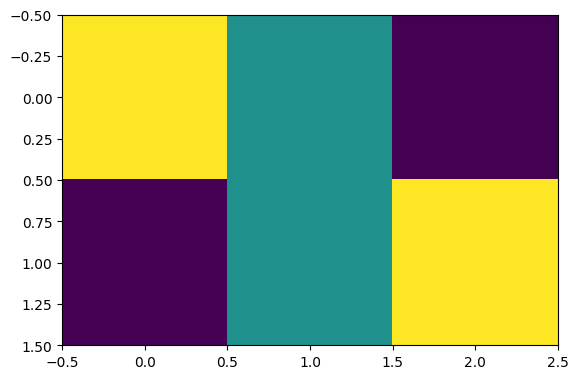

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.imshow(matriz)

Na imagem acima cada cor representa um número na nossa matriz.

Utilizando um valor aleatório, podemos produzir uma matriz que parecerá uma imagem de um ruído.

In [ ]:
img_aleatoria = np.random.normal(size = (100,100))

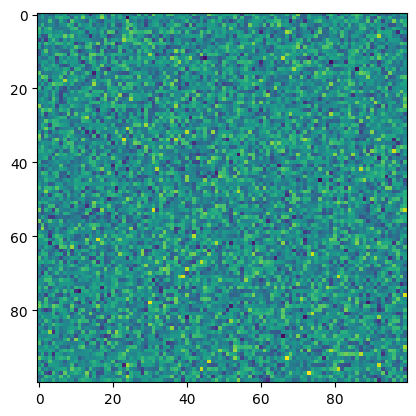

In [ ]:
fig, ax = plt.subplots()
ax.imshow(img_aleatoria)

4. **Tensor de rank 3:** Um tensor de três dimensões.

É uma espécie de matriz n-dimensional.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/7/71/Epsilontensor.svg/2880px-Epsilontensor.svg.png" width = 60%/>

In [ ]:
tensor= [[[3,2,1],[1,2,3]],[[3,2,1],[1,2,3]]]
tensor  

[[[3, 2, 1], [1, 2, 3]], [[3, 2, 1], [1, 2, 3]]]

In [ ]:
tensor = np.array([[[3,2,1],[1,2,3]],[[3,2,1],[1,2,3]]])
tensor

array([[[3, 2, 1],
        [1, 2, 3]],

       [[3, 2, 1],
        [1, 2, 3]]])

In [ ]:
tensor = torch.tensor([[[3,2,1],[1,2,3]],[[3,2,1],[1,2,3]]])
tensor

tensor([[[3, 2, 1],
         [1, 2, 3]],

        [[3, 2, 1],
         [1, 2, 3]]])

In [ ]:
t = [[[3,2,1],[1,2,3]],[[3,2,1],[1,2,3]]]
print(f"Tensor nativa: {t} ")
tensor = np.array(t)
print(f"Tensor em numpy: {tensor}, Dimensões: {tensor.shape}")
tensor = torch.tensor(t)
print(f"Tensor em pytorch: {tensor}, Dimensões: {tensor.shape}")

Tensor nativa: [[[3, 2, 1], [1, 2, 3]], [[3, 2, 1], [1, 2, 3]]] 
Tensor em numpy: [[[3 2 1]
  [1 2 3]]

 [[3 2 1]
  [1 2 3]]], Dimensões: (2, 2, 3)
Tensor em pytorch: tensor([[[3, 2, 1],
         [1, 2, 3]],

        [[3, 2, 1],
         [1, 2, 3]]]), Dimensões: torch.Size([2, 2, 3])


## Tecnicalidades do pytorch

PyTorch é o arcabouço que vamos usar para as nossas tarefas. Assim como o NumPy, o Pytorch é uma biblioteca de processamento vetorial/matricial/tensorial. Operações sobre os tensores do Pytorch possuem sintaxe consideravelmente parecida com operações sobre tensores do NumPy.

O mesmo faz uso de tensores bem similares ao NumPy. Porém, com PyTorch conseguimos fazer uso da GPU.

Utilizar a GPU foi revolucionário para Deep Learning, pois esses dispositivos são muito eficientes em fazer operações simples de soma e multiplicação. Numpy e a grande maioria das bibliotecas de Python vivem na CPU e são reféns da latência da memória do computador.

 A arquitetura da GPU permite que carreguemos nossos dados e nosso modelo para esse dispositivo, tornando-o muito mais eficiente para fazer operações repetitivas.




In [ ]:
if torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')

print(device)

cpu


In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cpu


No nosso caso, não temos GPU. Por padrão, os tensores são inicializados na CPU. Caso tivessemos uma GPU, precisaríamos "enviar" nosso tensor para a GPU e faríamos isto da seguinte forma:

In [ ]:
tns = torch.tensor([1,2,3]).to(device)

Pelo mesmo motivo que não conseguimos operar com numpy e um tensor na GPU, não podemos operar entre dois torch.tensors que estão em dispositivos diferentes, isto é, não podemos operar entre um tensor na CPU e outro na GPU.

Para convertermos de pytorch para numpy podemos usar o comando .numpy().

In [ ]:
tns_npy = tns.numpy()
tns_npy

array([1, 2, 3])

## Programação diferenciável


Notação: para manter um padrão, adotaremos um vetor como sendo um vetor coluna.
\begin{align}
  \mathbf{x}= \begin{bmatrix}
    x_{1} \\
    x_{2} \\
    \vdots \\
    x_{m}
\end{bmatrix}
\end{align}

Neste viés $dy/d\mathbf{x}$ é um vetor coluna:

\begin{align}
   \frac{dy}{d\mathbf{x}}= \begin{bmatrix}
    dy/dx_{1} \\
    dy/x_{2} \\
    \vdots \\
    dy/x_{n}
\end{bmatrix}
\end{align}

$d\mathbf{y}/dx$ também é um vetor coluna:

\begin{align}
   \frac{d\mathbf{y}}{dx}= \begin{bmatrix}
    dy_1/dx \\
    dy_2/x \\
    \vdots \\
    dy_n/x
\end{bmatrix}
\end{align}

Por fim, $d\mathbf{y}/d\mathbf{x}$ é uma matrix $n \times m$:

\begin{align}
   \frac{d\mathbf{y}}{dx} =
   \begin{bmatrix}
    dy_1/dx_1 & dy_1/dx_2 & \dots & dy_1/dx_n \\
    dy_2/dx_1 & dy_2/dx_2 & \dots & dy_2/dx_n \\
    \vdots & \vdots & \vdots & \vdots \\
    dy_m/dx_1 & dy_m/dx_2 & \dots & dy_m/dx_n 
\end{bmatrix}
\end{align}

Resumindo:

* $dy/dx \in \mathbb{R} $
* $dy/d\mathbf{x} \in \mathbb{R^m} $
* $d\mathbf{y}/dx \in \mathbb{R^m} $
* $d\mathbf{y}/d\mathbf{x} \in \mathbb{R^{m \times n}} $

Vamos implementar algumas derivadas. Vale ressaltar que existem diversas maneiras de se computar derivadas computacionalmente, como diferenciação numérica e diferenciação simbólica. No nosso caso, utilizaremos o método de backpropagation.

De maneira simples, o método de backpropagation funciona da seguinte forma:

Suponha que queremos derivar a expressão 

$$ e = (a+b)(b+1)$$

Podemos quebrar a expressão em partes mais simples, da seguinte forma:

$$ c = (a+b) \\ d =(b+1) \\ e=d * b$$

Assim, podemos construir o grafo computacional abaixo:

<img src="https://colah.github.io/posts/2015-08-Backprop/img/tree-def.png" width = 60%/>

Vamos computar o grafo para $a = 2$ e $b=1$.

<img src="https://colah.github.io/posts/2015-08-Backprop/img/tree-eval.png" width = 60%/>

Isso é conhecido como **forward pass**, pois estamos passando os parâmetros para frente e assim computando o valor final da expressão.

Agora, se derivarmos cada aresta do grafo, conseguiremos por meio da regra da cadeia obter qualquer derivada desse grafo:

<img src="https://colah.github.io/posts/2015-08-Backprop/img/tree-eval-derivs.png" width = 60% />

Contanto que consigamos dividir o problema em subproblemas que as derivadas sejam de funções fáceis de derivar, podemos computar a derivada de qualquer expressão.

Assim, se quisermos calcular $\partial e/ \partial b$, isto é, a mudança em $e$ provacada por $b$, podemos usar da regra da cadeia:


$$ \frac{\partial e}{ \partial b} = \frac{\partial e}{ \partial c}\frac{\partial c}{ \partial b}  + \frac{\partial e}{ \partial d}\frac{\partial d}{ \partial b} = 2 + 3 = 5 $$

As imagens vem dessa [página](https://colah.github.io/posts/2015-08-Backprop/). Vale dar uma lida, pois lá é abordado o a diferença de forward-mode differentiation and reverse-mode differentiation, que é muito importante.


Vamos a prática:

* $dy/dx \in \mathbb{R} $

In [ ]:
x = torch.tensor(3, dtype = torch.float, requires_grad = True)
y = x**2

y.backward()

print(x.grad)

tensor(6.)


* $dy/d\mathbf{x} \in \mathbb{R^m} $

Definimos um vetor x.

Criamos uma expressão que vai tomar x como input, i.e, uma função de x.

Chamamos o método backward nessa expressão. Precisamos especificar mara o método qual parâmetro derivaremos, isto é, naquele grafo, qual derivada estamos buscando.


In [ ]:
x = torch.tensor([1,2,3,10], dtype = torch.float, requires_grad = True)

fx = 3*x + x**3 + 1

fx.backward(x)

print(x.grad)

tensor([   6.,   30.,   90., 3030.])


Nossa expressão pode ser função de diversos parâmetros. Neste caso, precisamos especificar qual parâmetro temos interesse em derivar:


In [ ]:
x = torch.tensor([1,2,3,10], dtype = torch.float, requires_grad = True)
y = torch.tensor([np.pi,0,2,1], dtype = torch.float, requires_grad = True)

fxy = 3*x + x**3 + 1 + torch.exp(y)


fxy.backward(y)

print(y.grad)

tensor([72.6986,  0.0000, 14.7781,  2.7183])


Um exemplo mais concreto:

$$ f(x,y) = -\log\left(\frac{e^x}{e^x+e^y}\right)$$



In [ ]:
def log_exp(x, y):
    return -torch.log(torch.exp(x)/(torch.exp(x) + torch.exp(y)))

In [ ]:
x, y = torch.tensor([2.0]), torch.tensor([3.0])
z = log_exp(x, y)
z

tensor([1.3133])

In [ ]:
def grad(funcao_forward, x, y):
    x.requires_grad_(True)
    y.requires_grad_(True)
    z = funcao_forward(x, y)
    z.backward()
    return x.grad, y.grad

In [ ]:
x, y = torch.tensor([2.0], dtype = torch.double) ,torch.tensor([3.0], dtype = torch.double)
dx, dy = grad(log_exp, x, y)
dx, dy

(tensor([-0.7311], dtype=torch.float64), tensor([0.7311], dtype=torch.float64))

Testando para números maiores:

In [ ]:
x, y = torch.tensor([400.0]).double() ,torch.tensor([800.0]).double()
grad(log_exp, x, y)

(tensor([nan], dtype=torch.float64), tensor([nan], dtype=torch.float64))

Como os valores de x e y são grandes, mesmo utilizando double, os gradientes explodiram. Isto é um problema clássico de instabilidade númerica.

Por sorte, podemos reescrever nossa função de maneira mais estável, que não precise de usar três exponenciais:


$$ f(x,y) = \log (e^{y-x} + 1) $$


In [ ]:
x, y = torch.tensor([400.0], dtype = torch.double), torch.tensor([800.0], dtype = torch.double)
def stable_log_exp(x, y):
    return torch.log(1 + torch.exp(y-x))

dx, dy = grad(stable_log_exp, x, y)
dx, dy

(tensor([-1.], dtype=torch.float64), tensor([1.], dtype=torch.float64))